### Step 1: Import Libraries and input dataset

In [42]:
# Import all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector, RFE

In [2]:
os.environ['KAGGLE_USERNAME'] = "niranjanappaji"
os.environ["KAGGLE_KEY"] = "f969ecf53c07caf0b0ee95cf11175917"

!kaggle datasets download -d kumarajarshi/life-expectancy-who --unzip

df = pd.read_csv('Life Expectancy Data.csv')
df.head()

Dataset URL: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
License(s): other
100%|█████████████████████████████████████████| 119k/119k [00:00<00:00, 382kB/s]
100%|█████████████████████████████████████████| 119k/119k [00:00<00:00, 379kB/s]


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Step 2: Exploratory Data Analysis (EDA)

In [3]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [4]:
# Check for missing values

df.isnull().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
 HIV/AIDS                            0
Country                              0
Year                                 0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
under-five deaths                    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

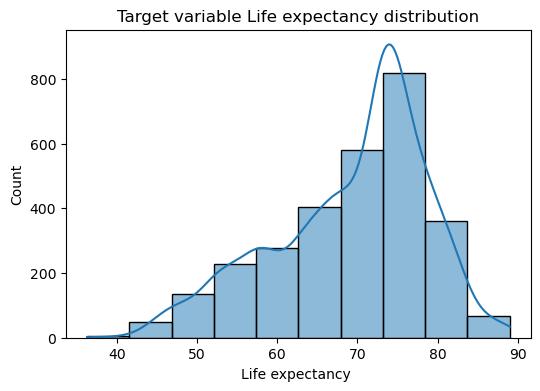

In [6]:
# Visualize the target variable

plt.figure(figsize=(6, 4))
sns.histplot(df['Life expectancy '], bins=10, kde=True)
plt.title('Target variable Life expectancy distribution')
plt.show()

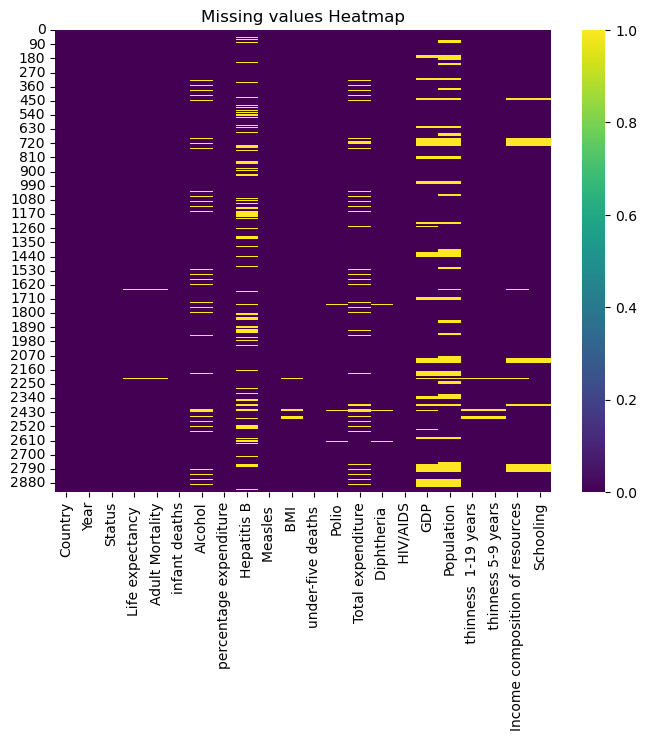

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing values Heatmap')
plt.show()

In [8]:
# Correlation matrix

correlation_matrix = df.select_dtypes(include='number').corr()
tgt_var_corr = correlation_matrix['Life expectancy '].abs()
selected_cols = tgt_var_corr[tgt_var_corr >= 0.5].index.tolist()
selected_cols

['Life expectancy ',
 'Adult Mortality',
 ' BMI ',
 ' HIV/AIDS',
 'Income composition of resources',
 'Schooling']

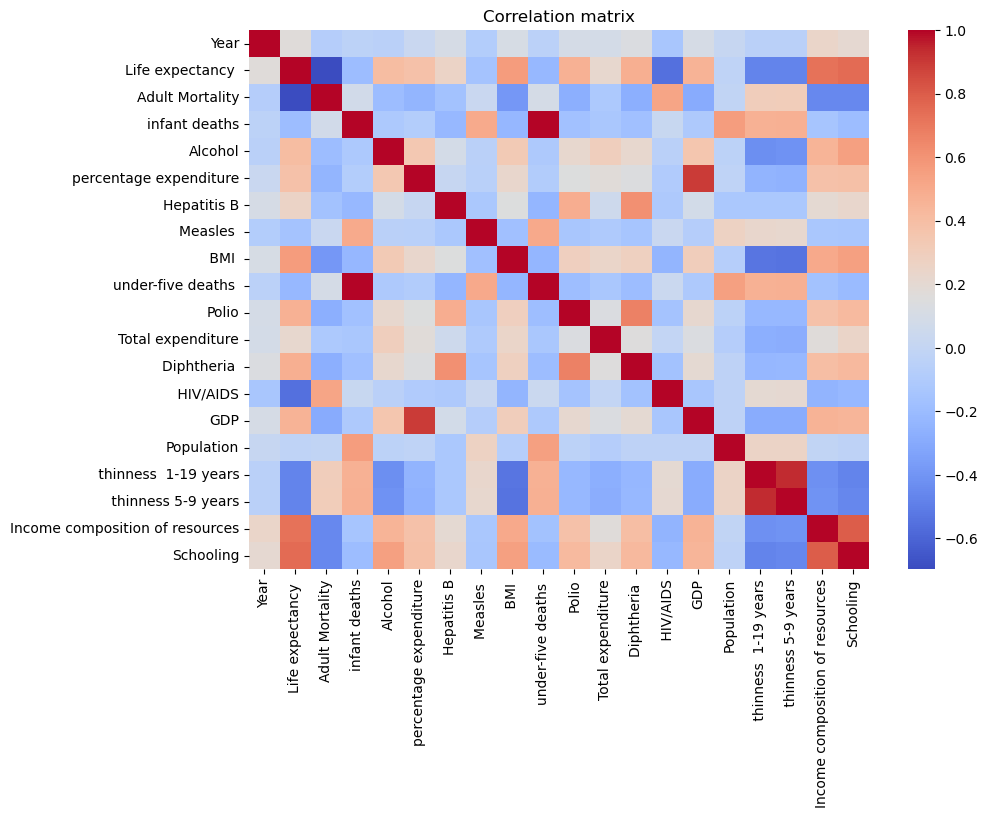

In [9]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

/Users/niranjanappaji/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

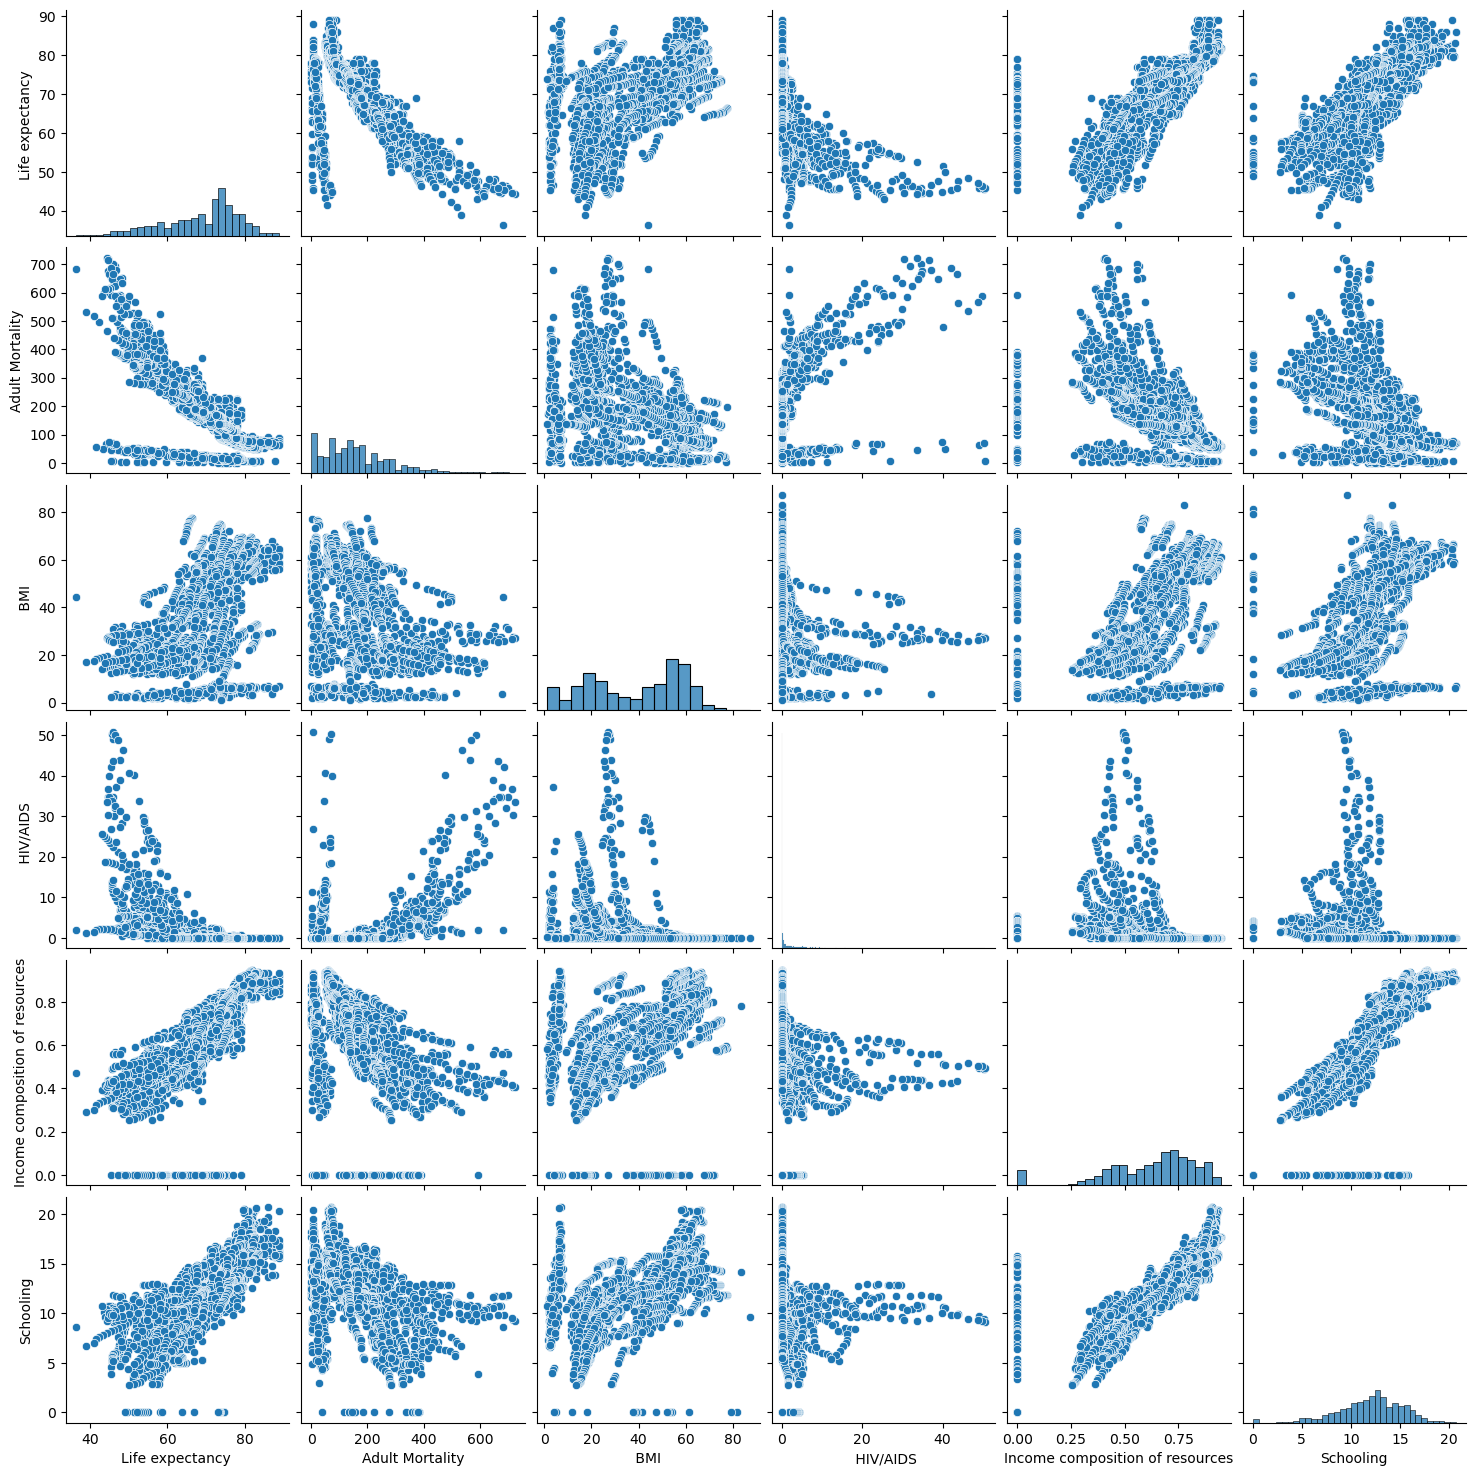

In [10]:
# Pair plots (to check for relationships between selected features)

if 'Life expectancy ' not in selected_cols:
    selected_cols.append('Life expectancy ')

plt.figure(figsize=(8, 6))
sns.pairplot(df[selected_cols])
plt.show()

### Step 3: Data Processing

In [11]:
# Remove leading and trailing blanks in the column names

df.columns = df.columns.str.strip().str.replace(' ', '_')
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [12]:
# Impute missing values

numeric_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(f'Numeric Columns: {numeric_cols}')
print(f'Categorical Columns: {categorical_cols}')

Numeric Columns: ['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years', 'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling']
Categorical Columns: ['Country', 'Status']


In [13]:
# for col in numeric_cols:
#     if df[col].dtype == 'number':
#         df[col].fillna(df[col].median(), inplace=True)
#     else:
#         df[col].fillna(df[col].mode()[0], inplace=True)
        
# df.isnull().sum().head()

In [14]:
# df.describe()

In [15]:
imputer_num = SimpleImputer(strategy = 'median')
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

df[numeric_cols].describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [16]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,False,False,False,False,False,False,False,False,False,True
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,False,False,False,False,False,False,False,False,False,True
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,False,False,False,False,False,False,False,False,False,True
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,False,False,False,False,False,False,False,False,False,True
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,...,False,False,False,False,False,False,False,False,True,True
2934,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,...,False,False,False,False,False,False,False,False,True,True
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,...,False,False,False,False,False,False,False,False,True,True
2936,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,...,False,False,False,False,False,False,False,False,True,True


### Step 3: Feature Selection (using correlation and VIF)


In [17]:
# Remove highly correlated independent variables (Multicollinearity)

correlation_matrix = df.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
upper_triangle

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
Year,NaN,0.170819,0.079535,0.037415,0.069147,0.031400,0.021302,0.082493,0.108484,0.042937,...,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.001864
Life_expectancy,NaN,NaN,0.696390,0.196769,0.388918,0.381418,0.170219,0.157767,0.556901,0.222738,...,0.068708,0.053239,0.009367,0.016755,0.032322,0.043121,0.041813,0.119303,0.145912,0.481415
Adult_Mortality,NaN,NaN,NaN,0.078890,0.190191,0.242628,0.123287,0.031293,0.379092,0.094280,...,0.063544,0.026714,0.011981,0.016015,0.001029,0.022762,0.028085,0.113078,0.177531,0.314894
infant_deaths,NaN,NaN,NaN,NaN,0.112918,0.085612,0.167421,0.501128,0.226796,0.996629,...,0.002583,0.018666,0.005251,0.019019,0.013135,0.000701,0.005693,0.001967,0.002348,0.112252
Alcohol,NaN,NaN,NaN,NaN,NaN,0.344410,0.090850,0.049752,0.313022,0.109790,...,0.070406,0.027829,0.052915,0.067104,0.049896,0.026755,0.080537,0.041758,0.002082,0.579662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Country_Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.005476,0.005476,0.005476,0.033995
Country_Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005476,0.005476,0.033995
Country_Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005476,0.033995
Country_Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033995


In [18]:
high_correlation_pairs = []
for col in upper_triangle.columns:
    for index in upper_triangle.index:
        if upper_triangle.loc[index, col] > 0.8:
            high_correlation_pairs.append((index, col, upper_triangle.loc[index, col]))

high_correlation_pairs

[('infant_deaths', 'under-five_deaths', 0.996628882039801),
 ('percentage_expenditure', 'GDP', 0.9018191027160021),
 ('thinness__1-19_years', 'thinness_5-9_years', 0.9391873974004579),
 ('infant_deaths', 'Country_India', 0.8387132725869234),
 ('under-five_deaths', 'Country_India', 0.8166825957892586)]

In [19]:
# upper_triangle.columns, upper_triangle.index

In [20]:
# upper_triangle.loc['Year', 'Life_expectancy']

In [21]:
if high_correlation_pairs:
    print("Pairs of columns with correlation > 0.8")
    for pair in high_correlation_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")
else:
    print("No pairs of columns with correlation > 0.8")

Pairs of columns with correlation > 0.8
infant_deaths - under-five_deaths: 0.997
percentage_expenditure - GDP: 0.902
thinness__1-19_years - thinness_5-9_years: 0.939
infant_deaths - Country_India: 0.839
under-five_deaths - Country_India: 0.817


In [22]:
to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.8)]
to_drop

['under-five_deaths', 'GDP', 'thinness_5-9_years', 'Country_India']

In [23]:
df.drop(to_drop, axis = 1, inplace = True)
df

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,Polio,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,6.0,...,False,False,False,False,False,False,False,False,False,True
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,58.0,...,False,False,False,False,False,False,False,False,False,True
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,62.0,...,False,False,False,False,False,False,False,False,False,True
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,67.0,...,False,False,False,False,False,False,False,False,False,True
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,68.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,67.0,...,False,False,False,False,False,False,False,False,True,True
2934,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,7.0,...,False,False,False,False,False,False,False,False,True,True
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,73.0,...,False,False,False,False,False,False,False,False,True,True
2936,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,76.0,...,False,False,False,False,False,False,False,False,True,True


### Step 4: Identify need for feature scaling

In [24]:
X = df.drop('Life_expectancy', axis =1)
y = df['Life_expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

numeric_cols = X_train.select_dtypes(include='number').columns.tolist()
for col in numeric_cols:
    print(f"{col}: min={X_train[col].min()}, max={X_train[col].max()}")

Year: min=2000.0, max=2015.0
Adult_Mortality: min=1.0, max=723.0
infant_deaths: min=0.0, max=1800.0
Alcohol: min=0.01, max=17.31
percentage_expenditure: min=0.0, max=19099.04506
Hepatitis_B: min=1.0, max=99.0
Measles: min=0.0, max=212183.0
BMI: min=1.4, max=87.3
Polio: min=3.0, max=99.0
Total_expenditure: min=0.65, max=17.24
Diphtheria: min=2.0, max=99.0
HIV/AIDS: min=0.1, max=50.6
Population: min=34.0, max=1293859294.0
thinness__1-19_years: min=0.1, max=27.7
Income_composition_of_resources: min=0.0, max=0.948
Schooling: min=0.0, max=20.7


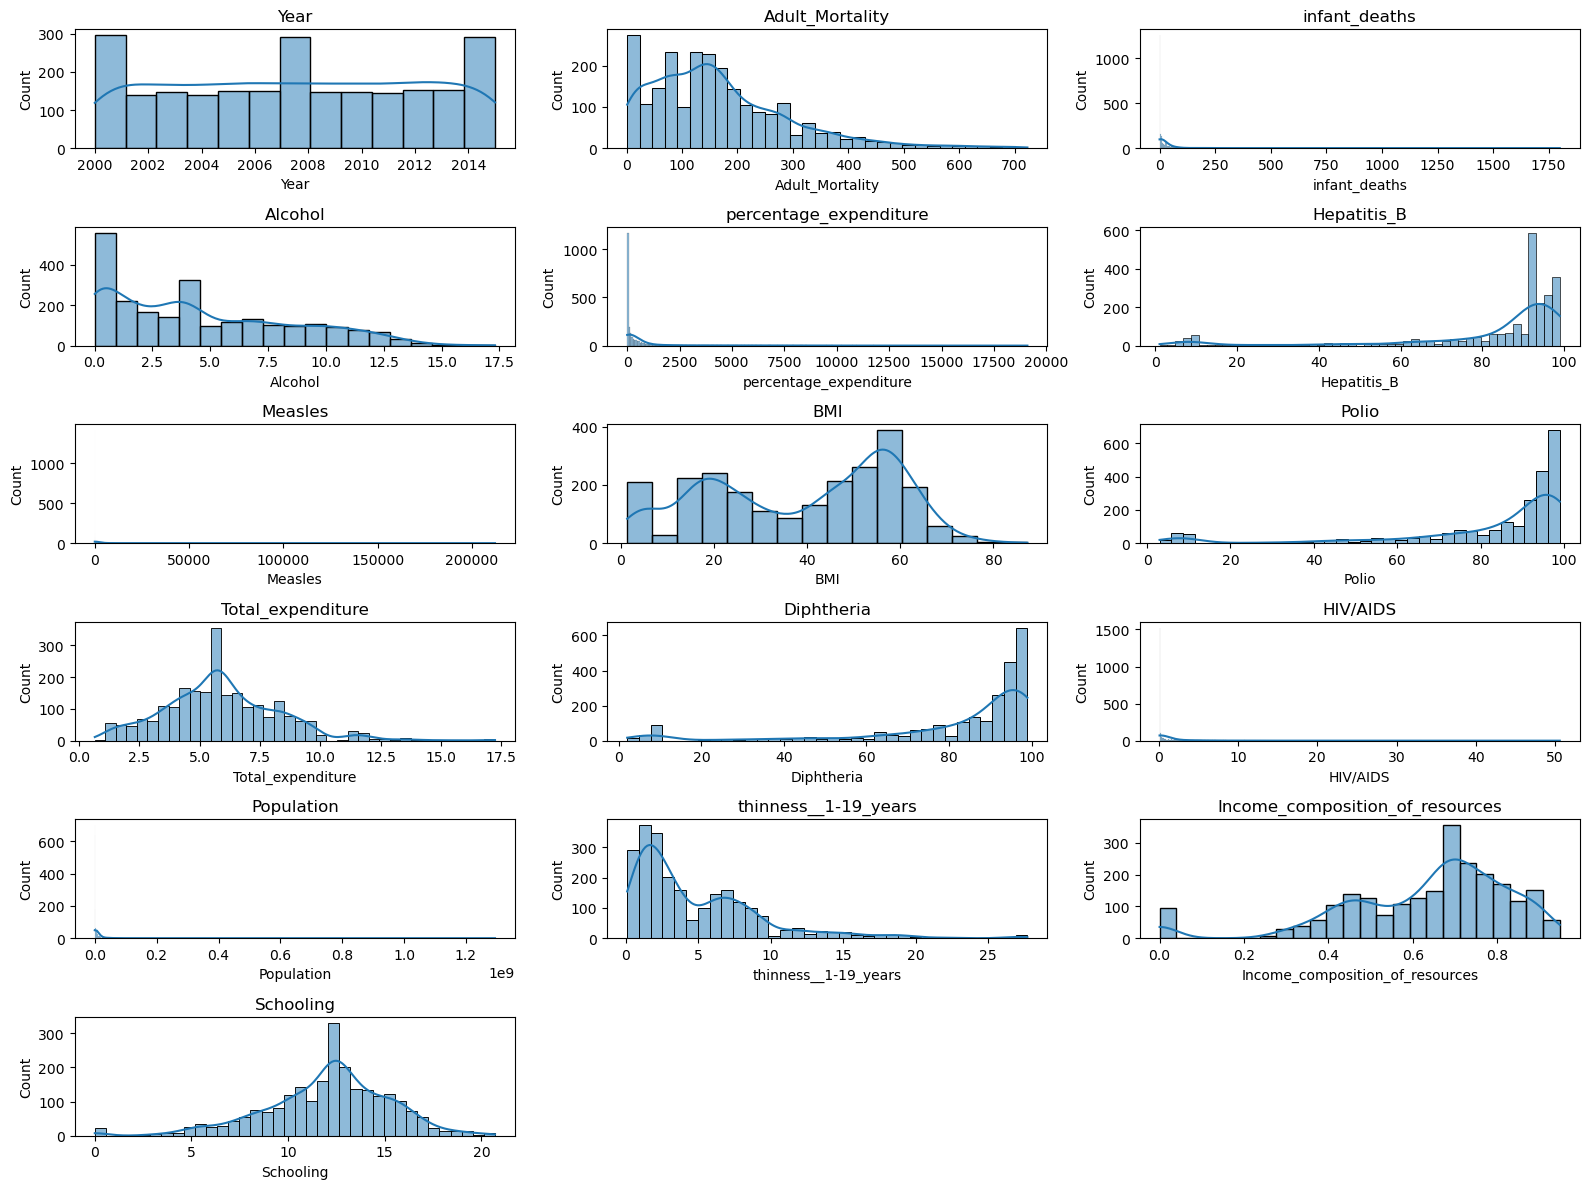

In [25]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(6, len(numeric_cols)// 5, i + 1)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

**Insights:** Significant difference in the ranges indicates the need for scaling. However, for interpretability purpose let us exclude 'Year' from feature scaling process

In [26]:
scaler = StandardScaler()

In [27]:
if 'Year' in numeric_cols:
    numeric_cols.remove('Year')

numeric_cols


['Adult_Mortality',
 'infant_deaths',
 'Alcohol',
 'percentage_expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'Population',
 'thinness__1-19_years',
 'Income_composition_of_resources',
 'Schooling']

In [28]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()


In [29]:
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.fit_transform(X_test[numeric_cols])


### Step 5: Train the Model

In [30]:
model = LinearRegression()
model


LinearRegression()

In [31]:
# Train the model
model.fit(X_train_scaled, y_train)


LinearRegression()

In [32]:
# Predict the model

y_pred = model.predict(X_test_scaled)


In [33]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [34]:
print(f'MSE from Linear Regression Model: {mse}')
print(f'RMSE from Linear Regression Model: {rmse}')
print(f'R2 Score from Linear Regression Model: {r2}')


MSE from Linear Regression Model: 3.867958331980235
RMSE from Linear Regression Model: 1.9667125697417596
R2 Score from Linear Regression Model: 0.9553700713253525


In [35]:
# Forward Selection

print('\n ---- Forward Selection -----')
forward_selector = SequentialFeatureSelector(model, n_features_to_select = 'auto', direction='forward', cv=5)
forward_selector.fit(X_train_scaled, y_train)
forward_selected_features = X.columns[forward_selector.get_support()]
print('Selected features:', forward_selected_features)
X_train_forward = forward_selector.transform(X_train_scaled)
X_test_forward = forward_selector.transform(X_test_scaled)

forward_model = LinearRegression()
forward_model.fit(X_train_forward, y_train)
y_pred_forward = forward_model.predict(X_test_forward)
FS_MSE = mean_squared_error(y_test, y_pred_forward)
FS_R2 = r2_score(y_test, y_pred_forward)
print(f"Forward Selection MSE: {FS_MSE}")
print(f"Forward Selection RMSE: {np.sqrt(FS_MSE)}")
print(f"Forward Selection R2 Score: {FS_R2}")



 ---- Forward Selection -----
Selected features: Index(['Year', 'Adult_Mortality', 'percentage_expenditure', 'BMI', 'Polio',
       'Diphtheria', 'HIV/AIDS', 'thinness__1-19_years',
       'Income_composition_of_resources', 'Schooling',
       ...
       'Country_Turkmenistan', 'Country_Uganda',
       'Country_United Kingdom of Great Britain and Northern Ireland',
       'Country_United Republic of Tanzania', 'Country_Uzbekistan',
       'Country_Vanuatu', 'Country_Viet Nam', 'Country_Zambia',
       'Country_Zimbabwe', 'Status_Developing'],
      dtype='object', length=104)
Forward Selection MSE: 5.320239244367696
Forward Selection RMSE: 2.3065643811451904
Forward Selection R2 Score: 0.938613118956059


In [37]:
# Backward Elimination

print('\n --- Backward Elimination -----')
backward_selector = SequentialFeatureSelector(model, n_features_to_select = 'auto', direction = 'backward', cv=5)
backward_selector.fit(X_train_scaled, y_train)
backward_selected_features = X.columns[backward_selector.get_support()]
print('Selected features:', backward_selected_features)
X_train_backward = backward_selector.transform(X_train_scaled)
X_test_backward = backward_selector.transform(X_test_scaled)

backward_model = LinearRegression()
backward_model.fit(X_train_backward, y_train)
y_pred_backward = backward_model.predict(X_test_backward)

print("Backward Selection MSE:", mean_squared_error(y_test, y_pred_backward))
print("Backward Selection RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_backward)))
print("Backward Selection R2 Score:", r2_score(y_test, y_pred_backward))


 --- Backward Elimination -----
Selected features: Index(['Year', 'Adult_Mortality', 'Diphtheria', 'HIV/AIDS', 'Schooling',
       'Country_Albania', 'Country_Algeria', 'Country_Angola',
       'Country_Antigua and Barbuda', 'Country_Argentina',
       ...
       'Country_Turkey', 'Country_Uganda', 'Country_United Arab Emirates',
       'Country_United Republic of Tanzania', 'Country_Uruguay',
       'Country_Vanuatu', 'Country_Venezuela (Bolivarian Republic of)',
       'Country_Viet Nam', 'Country_Zambia', 'Status_Developing'],
      dtype='object', length=104)
Backward Selection MSE: 6.37605592294768
Backward Selection RMSE: 2.5250853298349503
Backward Selection R2 Score: 0.9264307170235119


In [40]:
# Recursive Feature Elimination

print('\n --- Recursive Feature Elimination (RFE) ---')
rfe = RFE(model, n_features_to_select = 0.5)
rfe.fit(X_train_scaled, y_train)
rfe_selected_features = X.columns[rfe.support_]
print("Selected Features:", rfe_selected_features)
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

rfe_model = LinearRegression()
rfe_model.fit(X_train_rfe, y_train)
rfe_model.predict(X_test_rfe)

print("RFE MSE:", mean_squared_error(y_test, y_pred_backward))
print("RFE RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_backward)))
print("RFE R2 Score:", r2_score(y_test, y_pred_backward))




 --- Recursive Feature Elimination (RFE) ---
Selected Features: Index(['Country_Albania', 'Country_Algeria', 'Country_Angola',
       'Country_Antigua and Barbuda', 'Country_Argentina', 'Country_Armenia',
       'Country_Azerbaijan', 'Country_Bahamas', 'Country_Bahrain',
       'Country_Bangladesh',
       ...
       'Country_Tunisia', 'Country_Turkey', 'Country_Uganda',
       'Country_United Arab Emirates', 'Country_United Republic of Tanzania',
       'Country_Uruguay', 'Country_Vanuatu',
       'Country_Venezuela (Bolivarian Republic of)', 'Country_Viet Nam',
       'Status_Developing'],
      dtype='object', length=104)
RFE MSE: 6.37605592294768
RFE RMSE: 2.5250853298349503
RFE R2 Score: 0.9264307170235119


In [43]:
# Cross Validation

scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE:, {np.mean(-scores)}')

Cross-Validation MSE:, 1.8282167156075915e+22


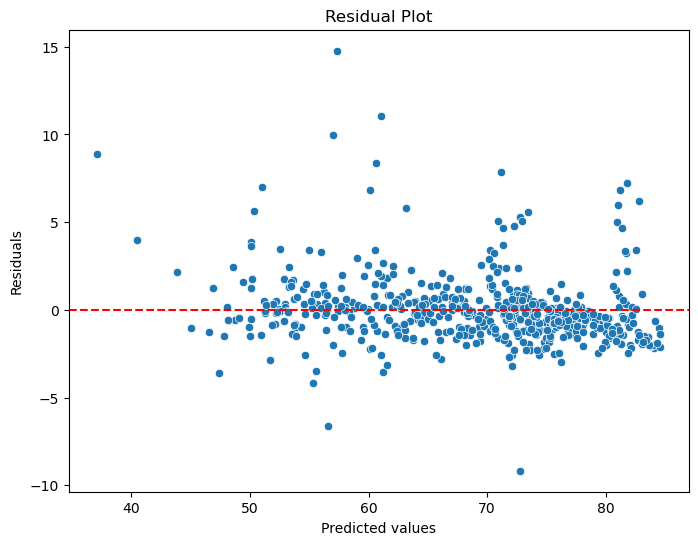

In [44]:
# Residual Analysis

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle = '--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


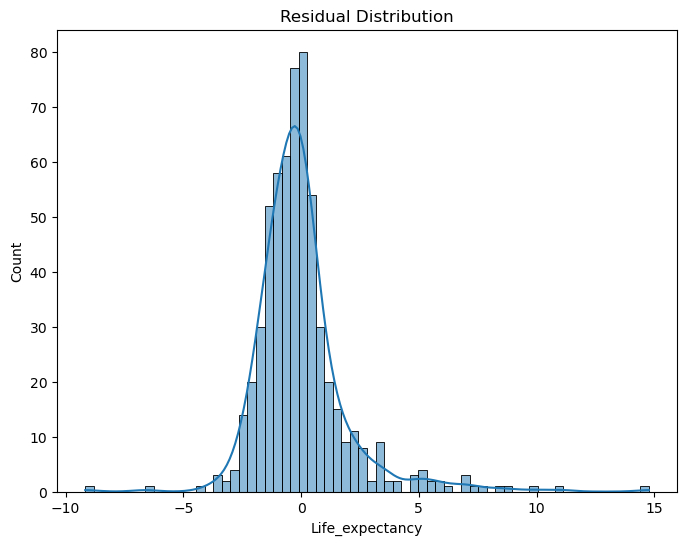

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.show()

In [46]:
# Feature importance

coefficients = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

                                   Coefficient
Country_Italy                     3.395754e+10
Country_Sweden                    3.395754e+10
Country_Japan                     3.395754e+10
Country_Switzerland               3.395754e+10
Country_Iceland                   3.395754e+10
...                                        ...
Country_Central African Republic -6.056770e+00
Country_Nigeria                  -6.606173e+00
Country_Côte d'Ivoire            -7.060050e+00
Country_Angola                   -8.348837e+00
Country_Sierra Leone             -1.157284e+01

[208 rows x 1 columns]
